In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-10-24 10:29:29.656669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [32]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [33]:
df['mpg'].value_counts().sort_index()
choose_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
df = df[choose_columns]

In [34]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model year        0.290316    1.000000  


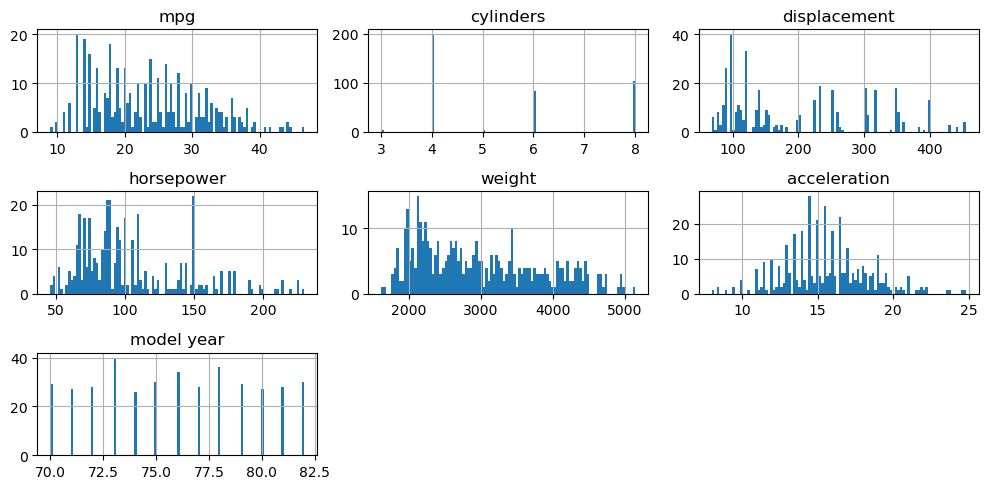

In [35]:
choose_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
df[choose_columns].hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()


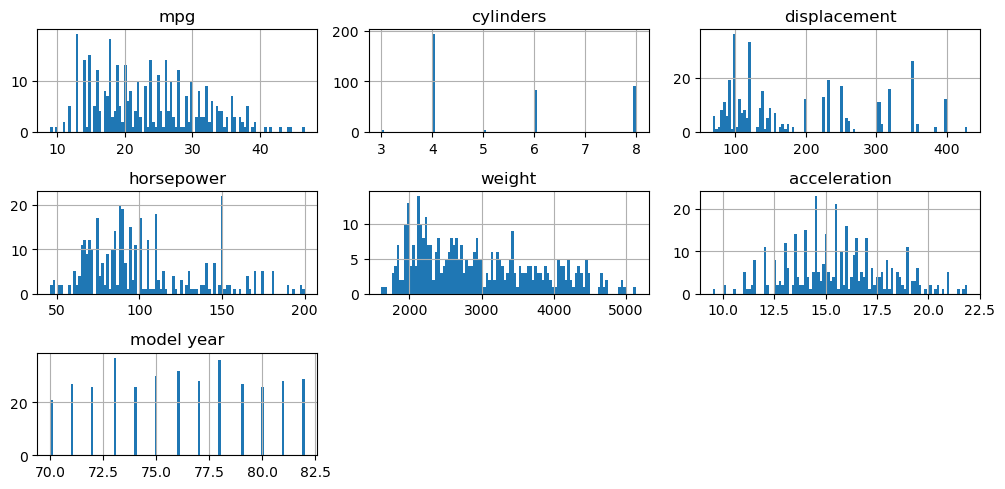

In [36]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

df = remove_outliers(df, choose_columns)

df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
choose_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df[choose_columns]

In [38]:
y = df['mpg'].values

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,shuffle=True,random_state=12)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X.columns)

y_train = y_train.reshape(-1, 1) 
y_test = y_test.reshape(-1, 1)    

y_train = scaler_y.fit_transform(y_train) 
y_test = scaler_y.transform(y_test)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mse(ry_preds, y_test))

평균제곱근오차 [0.15847969]


In [44]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mse(dy_preds, y_test))

평균제곱근오차 [0.33837977]


In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 [0.2619315]


### 2번째

In [48]:
y = df['mpg'].values

In [49]:
X = df[choose_columns]
X = X.values
X

array([[   8. ,  307. ,  130. , 3504. ,   12. ,   70. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5,   70. ],
       [   8. ,  318. ,  150. , 3436. ,   11. ,   70. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  120. ,   79. , 2625. ,   18.6,   82. ],
       [   4. ,  119. ,   82. , 2720. ,   19.4,   82. ]])

In [50]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
                                                
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = y_train.reshape(-1, 1) 
y_test = y_test.reshape(-1, 1)    

y_train = scaler_y.fit_transform(y_train) 
y_test = scaler_y.transform(y_test)

print(X_train.shape)
print(y_train.shape)

(298, 6)
(298, 1)


In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(8,input_shape=(6,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

2024-10-24 10:49:06.059664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,287
Trainable params: 1,287
Non-trainable params: 0
_________________________________________________________________


In [52]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
10/10 [==============================] - 1s 21ms/step - loss: 0.0886 - mse: 0.0886 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 8/20
10/10 [==============================] - 0s 36ms/step - loss: 0.0097 - mse: 0.

In [53]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.0075 - mse: 0.0075


[0.007527858484536409, 0.007527858484536409]

## 3번째

In [73]:
X = df[choose_columns]
X = X.values
X

array([[   8. ,  307. ,  130. , 3504. ,   12. ,   70. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5,   70. ],
       [   8. ,  318. ,  150. , 3436. ,   11. ,   70. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  120. ,   79. , 2625. ,   18.6,   82. ],
       [   4. ,  119. ,   82. , 2720. ,   19.4,   82. ]])

In [74]:
y = df['mpg'].values
y

array([18. , 15. , 18. , 16. , 17. , 15. , 15. , 15. , 24. , 22. , 18. ,
       21. , 27. , 26. , 25. , 24. , 25. , 26. , 21. , 10. ,  9. , 27. ,
       28. , 25. , 19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. ,
       12. , 13. , 13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. ,
       31. , 35. , 27. , 26. , 24. , 25. , 20. , 21. , 13. , 14. , 15. ,
       14. , 17. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 18. , 16. , 18. , 18. ,
       23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. , 18. ,
       19. , 21. , 26. , 15. , 29. , 24. , 20. , 19. , 15. , 24. , 20. ,
       11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. , 16. , 18. ,
       16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. , 32. , 28. ,
       24. , 26. , 24. , 26. , 31. , 19. , 18. , 15. , 15. , 16. , 15. ,
       16. , 14. , 17. , 16. , 15. , 18. , 21. , 20

In [76]:
def split_sequences(datas, labels, n_steps):
    X, y = list(), list()
    for i in range(len(datas)):
        end_ix = i + n_steps
        if end_ix > len(datas):
            break
        seq_x = datas[i:end_ix]
        seq_y = labels[min(len(labels)-1,end_ix)]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 5 
X, y = split_sequences(X, y, n_steps)

In [77]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y) 
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
X.shape

(369, 5, 6)

In [79]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


In [80]:
print(X_train.shape) 
print(y_train.shape) 

(295, 5, 6)
(295, 47)


In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM, Dense


model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [82]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 1s 27ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 

In [83]:
test_loss, test_mse = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212
